In [5]:
!pip install yfinance
!pip install mpl_finance
!pip install stockstats
!pip install get-all-tickers
!pip install Yahoo-ticker-downloader

     |████████████████████████████████| 5.5MB 11.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=1ae4f64cc3238ee5f6d010c1f510fa58ae1a1c7145ae7480758c92f68860f44b
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for get-all-tickers: filename=get_all_tickers-1.7-cp36-none-any.whl size=4242 sha256=1c9b4a6e7d679f3d8bc0dd9ef07c1bd84e77832469990e92fc1274017425af9b
  Stored in directory: /root/.cache/pip/wheels/d0/8b/ef/6cd3580f4b479aef881a32bd937c282982e3d186b617a663ac
Successfully built get-all-tickers
     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for Yahoo-ticker-downloader: filename=Yahoo_ticker_downloader-3.0.1-cp36-none-any.whl size=10184 sha256=7c9aa84ae3dfa0589733f73e62d072e34a0926f9874d7946c409693

In [6]:
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt

In [ ]:
# from get_all_tickers import get_tickers as gt
# filtered_tickers = gt.get_tickers_filtered(mktcap_min=500, mktcap_max=2000)
# # list_of_tickers = gt.get_tickers(NYSE=True, NASDAQ=True, AMEX=True)
# # # or if you want to save them to a CSV file
# gt.get_biggest_n_tickers(5)
# # get.save_tickers()
from get_all_tickers import get_tickers as gt
from get_all_tickers.get_tickers import Region
# tickers of all exchanges
tickers = gt.get_tickers(1)
print(tickers[:5])

# tickers from NYSE and NASDAQ only
tickers = get_tickers(AMEX=False)

# # default filename is tickers.csv, to specify, add argument filename='yourfilename.csv'
# save_tickers()

# # save tickers from NYSE and AMEX only
# save_tickers(NASDAQ=False)

# # get tickers from Asia
# tickers_asia = get_tickers_by_region(Region.ASIA)
# print(tickers_asia[:5])

# # save tickers from Europe
# save_tickers_by_region(Region.EUROPE, filename='EU_tickers.csv')

# # get tickers filtered by market cap (in millions)
# filtered_tickers = get_tickers_filtered(mktcap_min=500, mktcap_max=2000)
# print(filtered_tickers[:5])

# # not setting max will get stocks with $2000 million market cap and up.
# filtered_tickers = get_tickers_filtered(mktcap_min=2000)
# print(filtered_tickers[:5])

# # get tickers filtered by sector
# filtered_by_sector = get_tickers_filtered(mktcap_min=200e3, sectors=SectorConstants.FINANCE)
# print(filtered_by_sector[:5])

# # get tickers of 5 largest companies by market cap (specify sectors=SECTOR)
top_5 = gt.get_biggest_n_tickers(5)
print(top_5)

KeyboardInterrupt: ignored

In [54]:
# !pip install iexfinance
from iexfinance.refdata import get_iex_symbols

# tickers=pdr.get_iex_symbols()
tickers=pdr.get_nasdaq_symbols()
print(tickers.index.values[9614])


ZYXI


In [ ]:
tickers.index.values

array(['A', 'AA', 'AAA', ..., 'ZYME', 'ZYNE', 'ZYXI'], dtype=object)

In [ ]:
# tickers=["SPY","AAPL"]
# import SPY stock price
# df_spy = pdr.get_data_yahoo("SPY", start="2019-01-01", end="2019-09-30")
# import AAPL stock price
df_aapl = pdr.get_data_yahoo(tickers.index.values, start="2005-01-01", end="2021-12-31")

/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AAIC$B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AAIC$C', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ABR$A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ABR$B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ABR$C', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: Sym

In [ ]:
df_spy.head()
df_aapl.head()

Attributes   Adj Close             ...       Volume             
Symbols            SPY       AAPL  ...          SPY         AAPL
Date                               ...                          
2019-01-02  241.029480  38.562561  ...  126925200.0  148158800.0
2019-01-03  235.277832  34.721451  ...  144140700.0  365248800.0
2019-01-04  243.158661  36.203678  ...  142628800.0  234428400.0
2019-01-07  245.075882  36.123104  ...  103139100.0  219111200.0
2019-01-08  247.378433  36.811718  ...  102512600.0  164101200.0

[5 rows x 12 columns]

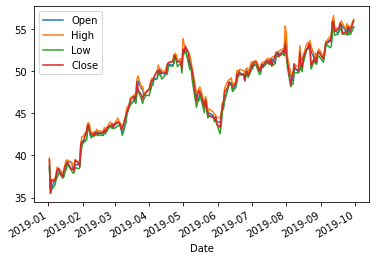

In [ ]:
df_aapl[["Open", "High", "Low", "Close"]].plot()
plt.show()

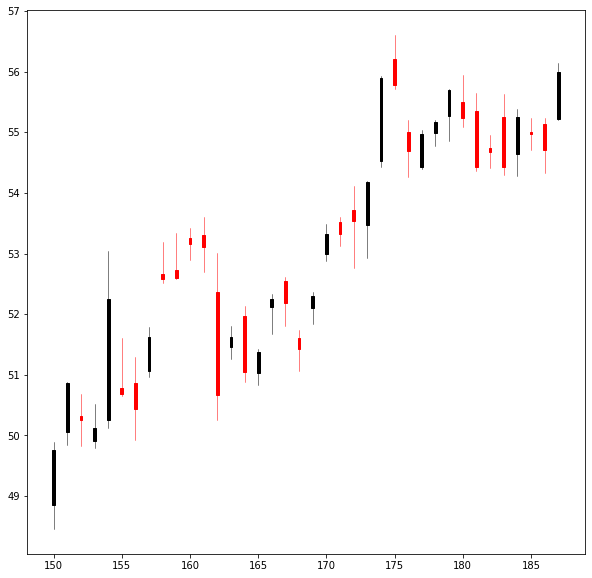

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()

plot_data = []
for i in range(150, len(df_aapl)):
    row = [
        i, 
        df_aapl.Open.iloc[i], 
        df_aapl.High.iloc[i], 
        df_aapl.Low.iloc[i], 
        df_aapl.Close.iloc[i], 
    ]
    plot_data.append(row)
candlestick_ohlc(ax, plot_data)
plt.show()

In [ ]:
from stockstats import StockDataFrame
stock = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])


In [ ]:
stock.keys()


Index(['open', 'close', 'high', 'low', 'volume'], dtype='object')

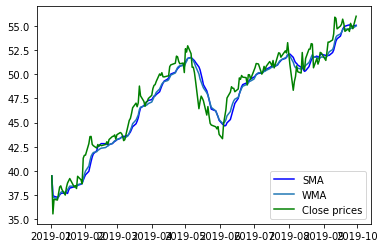

In [ ]:
plt.plot(stock["close_10_sma"], color="b", label="SMA")
plt.plot(stock["close_10_ema"],            label="WMA")
plt.plot(df_aapl.Close, color="g", label="Close prices")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#volume delta against previous day
stock['volume_delta']

# open delta against next 2 day
stock['open_2_d']

# open price change (in percent) between today and the day before yesterday
# 'r' stands for rate.
stock['open_-2_r']

# CR indicator, including 5, 10, 20 days moving average
stock['cr']
stock['cr-ma1']
stock['cr-ma2']
stock['cr-ma3']

# volume max of three days ago, yesterday and two days later
stock['volume_-3,2,-1_max']

# volume min between 3 days ago and tomorrow
stock['volume_-3~1_min']

# KDJ, default to 9 days
stock['kdjk']
stock['kdjd']
stock['kdjj']

# # three days KDJK cross up 3 days KDJD
# stock['kdj_3_xu_kdjd_3']

# 2 days simple moving average on open price
stock['open_2_sma']

# MACD
stock["macd"]
# MACD signal line
stock['macds']
# MACD histogram
stock['macdh']

# bolling, including upper band and lower band
stock['boll']
stock['boll_ub']
stock['boll_lb']

# close price less than 10.0 in 5 days count
stock['close_10.0_le_5_c']

# CR MA2 cross up CR MA1 in 20 days count
stock['cr-ma2_xu_cr-ma1_20_c']

# count forward(future) where close price is larger than 10
stock['close_10.0_ge_5_fc']

# 6 days RSI
stock['rsi_6']
# 12 days RSI
stock['rsi_12']

# 10 days WR
stock['wr_10']
# 6 days WR
stock['wr_6']

# CCI, default to 14 days
stock['cci']
# 20 days CCI
stock['cci_20']

# TR (true range)
stock['tr']
# ATR (Average True Range)
stock['atr']

# DMA, difference of 10 and 50 moving average
stock['dma']

# DMI
# +DI, default to 14 days
stock['pdi']
# -DI, default to 14 days
stock['mdi']
# DX, default to 14 days of +DI and -DI
stock['dx']
# ADX, 6 days SMA of DX, same as stock['dx_6_ema']
stock['adx']
# ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
stock['adxr']

# TRIX, default to 12 days
stock['trix']
    # TRIX based on the close price for a window of 3
stock['close_3_trix']
# MATRIX is the simple moving average of TRIX
stock['trix_9_sma']
# TEMA, another implementation for triple ema
stock['tema']
    # TEMA based on the close price for a window of 2
stock['close_2_tema']

# VR, default to 26 days
stock['vr']
# MAVR is the simple moving average of VR
stock['vr_6_sma']

stock["macd"] 
stock["macds"]

Date
2019-01-02    0.000000
2019-01-03   -0.049016
2019-01-04   -0.055716
2019-01-07   -0.055928
2019-01-08   -0.045894
                ...   
2019-09-24    0.913940
2019-09-25    0.902038
2019-09-26    0.885444
2019-09-27    0.860494
2019-09-30    0.850195
Name: macds, Length: 188, dtype: float64

In [ ]:
stock.head()

,open,close,high,low,volume,close_10_sma,close_10_ema,volume_delta,open_2_s,open_2_d,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,volume_-3_s,volume_-1_s,volume_2_s,"volume_-3,2,-1_max",volume_-2_s,volume_0_s,volume_1_s,volume_-3~1_min,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,...,rsi_12,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,38.722500,39.480000,39.712502,38.557499,148158800.0,39.480000,39.480000,NaN,36.132500,2.590000,NaN,39.250000,NaN,NaN,NaN,NaN,NaN,NaN,234428400.0,234428400.0,NaN,148158800.0,365248800.0,148158800.0,79.870003,59.956668,59.956668,53.318889,53.318889,73.232225,73.232225,38.722500,0.000000,0.000000,0.000000,39.480000,NaN,39.480000,NaN,NaN,...,NaN,20.129997,20.129997,39.250000,NaN,39.250000,NaN,NaN,NaN,39.480000,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.480000,39.480000,NaN,NaN,NaN
2019-01-03,35.994999,35.547501,36.430000,35.500000,365248800.0,37.513750,37.317125,217090000.0,37.174999,-1.180000,NaN,35.825834,0.000000,NaN,NaN,NaN,NaN,148158800.0,219111200.0,219111200.0,NaN,365248800.0,234428400.0,148158800.0,1.127611,40.346982,40.346982,48.994920,48.994920,23.051106,23.051106,37.358749,-0.088229,-0.049016,-0.039213,37.513750,2.780697,37.513750,43.075143,31.952357,...,0.000000,98.872389,98.872389,37.537917,-66.666667,37.537917,-66.666667,3.980000,3.980000,37.513750,0.0,-3.282501,0.000000,-3.057499,3.057499,0.000000,0.000000,0.000000,3.980000,0.000000,0.000000,3.057499,1.637946,1.637946,41.154423,41.154423,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,-1.583025,-2.951329,-1.583025,35.799181,35.608946,-9.960737,0.000000,0.000000
2019-01-04,36.132500,37.064999,37.137501,35.950001,234428400.0,37.364166,37.215772,-130820400.0,37.389999,-1.257500,-6.688618,36.717500,34.977790,NaN,NaN,NaN,NaN,365248800.0,164101200.0,365248800.0,148158800.0,234428400.0,219111200.0,148158800.0,37.151289,39.281751,39.281751,45.757197,45.757197,26.330859,26.330859,36.063749,-0.065364,-0.055716,-0.009648,37.364166,1.983246,37.364166,41.330657,33.397675,...,29.625390,62.848711,62.848711,37.264445,-27.546172,37.264445,-27.546172,1.590000,2.740741,37.364166,0.0,0.707500,0.707500,0.450001,0.000000,0.707500,0.270268,0.270268,2.740741,9.861115,9.861115,0.000000,1.012245,1.012245,36.933265,36.933265,57.853422,57.853422,75.414496,75.414496,85.658456,85.658456,-0.957570,-1.512992,-1.270298,36.612955,36.922906,4.268930,64.183209,32.091604
2019-01-07,37.174999,36.982498,37.207500,36.474998,219111200.0,37.268749,37.138919,-15317200.0,37.822498,-0.647499,3.278234,36.888332,45.126282,NaN,NaN,NaN,148158800.0,234428400.0,180396400.0,234428400.0,365248800.0,219111200.0,164101200.0,148158800.0,35.192822,37.918775,37.918775,43.144390,43.144390,27.467545,27.467545,36.653749,-0.056341,-0.055928,-0.000413,37.268749,1.630519,37.268749,40.529788,34.007711,...,29.113849,64.807178,64.807178,37.170417,-18.085939,37.170417,-18.085939,0.732502,2.021152,37.268749,0.0,0.070000,0.070000,0.524998,0.000000,0.070000,0.209000,0.209000,2.021152,10.340635,10.340635,0.000000,0.702571,0.702571,34.760897,34.760897,54.145084,54.145084,65.853017,65.853017,76.755094,76.755094,-0.669365,-0.856216,-1.069987,36.847458,37.011742,-0.222583,40.117120,34.766776
2019-01-08,37.389999,37.687500,37.955002,37.130001,164101200.0,37.352499,37.296401,-55010000.0,38.125000,-0.735001,3.480246,37.590834,71.843102,0.0,NaN,NaN,365248800.0,219111200.0,143122800.0,365248800.0,234428400.0,164101200.0,180396400.0,164101200.0,51.928765,42.588771,42.588771,42.959184,42.959184,41.847947,41.847947,37.282

In [ ]:
# plt.plot(stocks["close_10_sma"], color="b", label="SMA") # plotting SMA
# plt.plot(stocks["close_10_ema"], color="k", label="EMA")
# # plt.plot(stocks["wma"],            label="wma")
# plt.plot(stocks["macd"],            label="macd")
# plt.plot(df_aapl.Close, color="g", label="Close prices") # plotting close prices
# plt.legend(loc="lower right")
# plt.show()

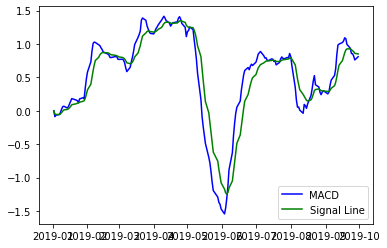

In [ ]:
plt.plot(stock["macd"] , color="b", label="MACD")
plt.plot(stock["macds"], color="g", label="Signal Line")
plt.legend(loc="lower right")
plt.show()